## HW04 Code

You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file (`hw04.ipynb`), `implementation.py`, and two files for both trees images, i.e., `full`, `full.pdf`, `simple`, and `simple.pdf` (PDFs and text files generated using `graphviz` within the code). HINT: `render()`, and it should be clear when to use it, i.e., #3). Compress all files mentioned and submit to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](https://piazza.com/class/lcwv1h9p2a11ai/).

### Import required libraries.

In [1]:
import numpy as np
import pandas as pd

import sklearn.tree
import graphviz

from implementation import information_remainder, counting_heuristic, set_entropy

%load_ext autoreload
%autoreload 2

## Decision Trees

You should start by computing the two heuristic values for the toy data described in the assignment handout. You should then load the two versions of the abalone data, compute the two heuristic values on features (for the simplified data), and then build decision trees for each set of data.

### 1 Compute both heuristics for toy data.

In [2]:
feature_names = np.array(["A", "B"])
feature_len = 2
classes = [0, 1]

x_set = np.array([[1, 1], [1, 1], [0, 1], [0, 0],
        [0, 1], [0, 0], [0, 0], [0, 0]])
y_set = np.array([0, 0, 0, 0, 1, 1, 1, 1])

#### (a) Compute the counting-based heuristic, and order the features by it.

In [3]:
# TODO counting_heuristic()

# TODO sort the feature names by their correct counts
# e.g., sort_correct = [best, second_best, ..., worst]
# e.g., sort_names = ["A", "B"] or ["B","A"]
# Compute counting heuristic for toy dataset
counting_heuristics = []
for i in range(feature_len):
    counting_heuristics.append(counting_heuristic(x_set, y_set, i, classes))

# Sort the feature names by their correct counts
sort_indices = np.argsort(counting_heuristics)[::-1]

sort_correct = np.array(counting_heuristics)[sort_indices]  #TODO: FIX ME
sort_names = feature_names[sort_indices] #TODO: FIX ME

# Print the sorted features along with their correct predictions count in the smaller dataset
longest = max(len(name) for name in sort_names)
for name, correct in zip(sort_names, sort_correct):
    print("%*s: %d/%d" % (longest, name, correct, len(x_set)))

B: 6/8
A: 6/8


#### (b) Compute the information-theoretic heuristic, and order the features by it.

In [4]:
# TODO information_remainder()

# TODO sort the feature names by their gains
information_gains = []
for i in range(feature_len):
    information_gains.append(information_remainder(x_set, y_set, i, classes))

sort_indices = np.argsort(information_gains)[::-1]

sort_gains = np.array(information_gains)[sort_indices]  #TODO: FIX ME
sort_names_by_gains = feature_names[sort_indices] #TODO: FIX ME

longest = max(len(name) for name in sort_names_by_gains)
for name, gain in zip(sort_names_by_gains, sort_gains):
    print("%*s: %.3f" % (longest, name, gain))

A: 0.311
B: 0.189


#### (c) Discussion of results.

**_Answer_**:

Using the counting-based heuristic, both features A and B had the same number of correctly classified instances (6 out of 8). In this case, either feature could be chosen to start the tree, as they both seem to have the same predictive power according to this heuristic. Since there is a tie, we might choose the feature based on other factors such as domain knowledge or simply choose one at random.

On the other hand, using the information-theoretic heuristic, feature A has an information gain of 0.311, while feature B has an information gain of 0.189. Since feature A has a higher information gain, it is considered more informative for making predictions in the dataset, and we would choose it as the first feature to split the tree.

The choice of heuristic can significantly affect the structure of the resulting decision tree, as different heuristics prioritize different aspects of the data when selecting the best splitting feature. The counting-based heuristic focuses on maximizing the number of correctly classified instances, which may lead to a preference for splits that only increase accuracy marginally. In contrast, the information-theoretic heuristic evaluates the quality of a split based on how much it reduces the overall uncertainty (entropy) in the data. This often leads to more balanced and better-generalizing trees.

In this specific example, the counting-based heuristic considers both features A and B as equally important, while the information-theoretic heuristic identifies feature A as more informative. Depending on the chosen heuristic, the resulting decision tree will have a different structure, which can potentially lead to different classification results on new data.

In general, the choice of heuristic can affect the tree's structure, complexity, and performance on unseen data. It is essential to experiment with different heuristics and evaluate the resulting decision trees using techniques like cross-validation to select the best approach for a specific problem.

### 2 Compute both heuristics for simplified abalone data.

In [5]:
# load the data into np arrays

# TODO:fix the empty lists below
# full-feature abalone data
x_train = pd.read_csv('data_abalone/x_train.csv').values
x_test = pd.read_csv('data_abalone/x_test.csv').values
y_train = pd.read_csv('data_abalone/y_train.csv')['rings'].values
y_test = pd.read_csv('data_abalone/y_test.csv')['rings'].values

# TODO:fix the empty lists below
# simplified version of the data (Restricted-feature)
simple_x_train = pd.read_csv('data_abalone/small_binary_x_train.csv').values
simple_x_test = pd.read_csv('data_abalone/small_binary_x_test.csv').values
simple_y_train = pd.read_csv('data_abalone/3class_y_train.csv')['rings'].values
simple_y_test = pd.read_csv('data_abalone/3class_y_test.csv')['rings'].values

# get useful information
# TODO:fix the empty lists below
full_feature_names = np.array(pd.read_csv('data_abalone/x_train.csv').columns) # features names of full-feature abalone data
simple_feature_names = np.array(pd.read_csv('data_abalone/small_binary_x_train.csv').columns) # features names of restricted-feature data
classes_abalone = np.unique(simple_y_train) # unique set of class labels for the simple data
class_names = ["Small", "Medium", "Large"] # name of the classes for the simple data

#### (a) Compute the counting-based heuristic, and order the features by it.

In [6]:
# TODO counting_heuristic()
# Compute the counting-based heuristic for each feature in the simplified abalone data
correct_counts_abalone = [counting_heuristic(simple_x_train, simple_y_train, i, classes_abalone) for i in range(simple_x_train.shape[1])]

# TODO sort the feature names by their correct counts
sort_indices_abalone = np.argsort(correct_counts_abalone)[::-1] # the indices that sort the correct counts in descending order

sort_correct_abalone = np.array(correct_counts_abalone)[sort_indices_abalone]  #TODO: FIX ME
sort_names_abalone = simple_feature_names[sort_indices_abalone] #TODO: FIX ME

# Print the sorted features along with their correct predictions count in the smaller dataset
longest = max(len(name) for name in sort_names_abalone)
for name, correct in zip(sort_names_abalone, sort_correct_abalone):
    print("%*s: %d/%d" % (longest, name, correct, len(simple_x_train)))

height_mm: 2316/3176
  diam_mm: 2266/3176
length_mm: 2230/3176
  is_male: 1864/3176


#### (b) Compute the information-theoretic heuristic, and order the features by it.

In [7]:
# TODO information_remainder()
information_gains_abalone = [information_remainder(simple_x_train, simple_y_train, i, classes_abalone) for i in range(simple_x_train.shape[1])]

# TODO sort the feature names by their gains
sort_indices_abalone = np.argsort(information_gains_abalone)[::-1]

sort_gains_abalone = np.array(information_gains_abalone)[sort_indices_abalone]  #TODO: FIX ME
sort_names_by_gains_abalone = np.array(simple_feature_names)[sort_indices_abalone] #TODO: FIX ME

longest = max(len(name) for name in sort_names_by_gains_abalone)
for name, gain in zip(sort_names_by_gains_abalone, sort_gains_abalone):
    print("%*s: %.3f" % (longest, name, gain))

height_mm: 0.173
  diam_mm: 0.150
length_mm: 0.135
  is_male: 0.025


### 3 Generate decision trees (criterion='entropy', random_state=42) for full- and simple-feature data

#### (a) Train and eval on entire train and test sets. Print accuracy values and generate tree images.

Render the tree diagram, naming it "full." A text file and PDF should be created and saved (i.e., `full` and `full.pdf`) - include both in submission.

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score

# Create a decision tree classifier with entropy as the criterion and a fixed random state
full_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the full-feature data
full_clf.fit(x_train, y_train)

# TODO calculate accuracies
# Predict the outputs for the train and test sets
y_train_pred = full_clf.predict(x_train)
y_test_pred = full_clf.predict(x_test)

# Calculate the accuracy for the train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred) # Fix me
test_accuracy = accuracy_score(y_test, y_test_pred) # Fix me
print(f"Accuracy (train): {train_accuracy:.3f}")
print(f"Accuracy  (test): {test_accuracy:.3f}")

# TODO generate tree image
# Export the tree in DOT format
dot_data = export_graphviz(full_clf, out_file=None, feature_names=full_feature_names)

# Create a Graphviz object from the DOT data
graph = graphviz.Source(dot_data)

# Render and save the tree image as a PDF
graph.render("full", format="pdf")

Accuracy (train): 1.000
Accuracy  (test): 0.204


'full.pdf'

#### (b) Restricted-feature (aka simple) data.
Train and eval on simple train and test sets. Same as above, accept this time use the `simple` set. Render the tree diagram, naming it "simple." A text file and PDF should be created and saved (i.e., `simple` and `simple.pdf`) - include both in submission.

In [9]:
# Create a decision tree classifier with entropy as the criterion and a fixed random state
simple_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the full-feature data
simple_clf.fit(simple_x_train, simple_y_train)

# TODO calculate out accuracies
# Predict the outputs for the train and test sets
simple_y_train_pred = simple_clf.predict(simple_x_train)
simple_y_test_pred = simple_clf.predict(simple_x_test)

# Calculate the accuracy for the train and test sets
simple_train_accuracy = accuracy_score(simple_y_train, simple_y_train_pred) # Fix me
simple_test_accuracy = accuracy_score(simple_y_test, simple_y_test_pred) # Fix me
print(f"Accuracy (train): {simple_train_accuracy:.3f}")
print(f"Accuracy  (test): {simple_test_accuracy:.3f}")

# TODO generate tree image
# Export the tree in DOT format
simple_dot_data = export_graphviz(simple_clf, out_file=None, feature_names=simple_feature_names, class_names=class_names)

# Create a Graphviz object from the DOT data
simple_graph = graphviz.Source(simple_dot_data)

# Render and save the tree image as a PDF
simple_graph.render("simple", format="pdf")

Accuracy (train): 0.733
Accuracy  (test): 0.722


'simple.pdf'

#### (c) Discuss the results seen for the two trees

*TODO*

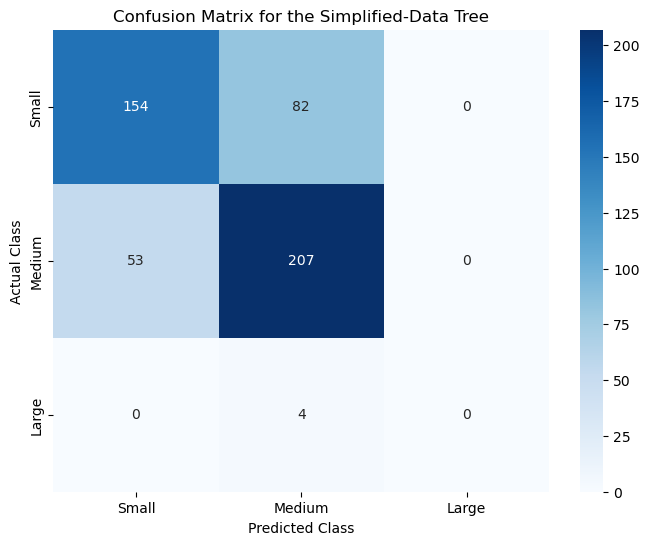

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for the simplified-data tree
cm = confusion_matrix(simple_y_test, simple_y_test_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix for the Simplified-Data Tree')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**_answer_**:

The results obtained from the decision trees trained on the full-feature and simplified abalone datasets provide valuable insights.

1. Accuracy scores:

    (1) Full-feature data: The training accuracy is 1.000, while the test accuracy is 0.204. This indicates that the model has overfit the training data and is not generalizing well to unseen data. The model has learned the noise in the training data and is not able to perform well on the test set. This is probably because the full-feature abalone dataset has a numerical target variable (rings), which makes the prediction task more challenging. When calculating accuracy, the model needs to predict the exact number of rings to be considered correct. This is a strict evaluation criterion, as even a small difference in the number of rings between the predicted and actual values will be considered incorrect.

    (2) Simplified data: The training accuracy is 0.733, and the test accuracy is 0.722. These values indicate that the model performs better on the test set than the full-feature data model. The difference between training and test accuracies is smaller, suggesting that the model is generalizing better and not overfitting as much. This is probably because the simplified dataset has been transformed into a classification problem with three classes (Small, Medium, and Large). This makes the task less challenging as the model only needs to predict the correct class, not the exact number of rings.

    (3) As a result, the decision tree trained on the simplified dataset appears to generalize better and achieve higher test accuracy compared to the tree trained on the full-feature dataset. The full-feature tree may struggle to predict the exact number of rings, leading to lower accuracy scores. In summary, the nature of the target variable (numerical vs. categorical) plays a significant role in the performance of the decision trees and the accuracies obtained.

2. Differences between the two trees:

    (1) The tree generated from the full-feature data is more complex and deeper than the tree from the simplified data. Because the full-feature abalone dataset has a numerical target variable (rings), the full-feature data tree is probably overfitting, capturing noise and intricate patterns in the training data that do not generalize well.

    (2) The tree generated from the simplified data is simpler and shallower, focusing on the most important features to make predictions. This allows it to generalize better and achieve a higher test accuracy.

3. Errors in the simplified-data tree:

    (1) To analyze the errors made by the simplified-data tree, we can look at the leaves of the tree and compare the predicted class with the true class. We can also create a confusion matrix to visualize the errors made by the classifier, then generate the corresponding heatmap to show the frequency of correct and incorrect predictions made by the simplified-data tree. From the heatmap, we can see that in the 236 actual small abalones, the simplified-data tree predicted 154 correctly and 82 incorrectly as medium. Similarly, in the 260 actual medium abalones, the simplified-data tree predicted 207 correctly and 53 incorrectly as small. Finally, all 4 actual large abalones were misclassified as medium. This indicates that the simplified-data tree is making errors in the following ways: (a) Predicting 53 medium abalones as small, (b) Predicting 82 small abalones as medium, and (c) Predicting 4 large abalones as medium.

    (2) Some errors may arise from the tree not being able to capture all the information present in the full-feature data, as it only uses a subset of all features. This might lead to incorrect classification in some instances.
    
    (3) However, given the relatively high test accuracy (0.722), the simplified-data tree seems to be making reasonably good predictions.
    
In conclusion, the simplified abalone dataset decision tree performs better on the test set compared to the full-feature data tree. While it may make some errors due to using a limited set of features, the simpler model generalizes better and is less prone to overfitting.